# End-toEnd Decel Extraction for LowCostCTG Recordings


In [1]:
%matplotlib inline

In [2]:
import pickle
import os
from pprint import pprint
import datetime
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

from pprint import pprint
import sys

In [3]:
sys.path.append('/Users/doug/Documents/GitHub/LowCostCTG/CombinedRecorder')

In [4]:
from libLowCostCTG import selectRecordings, getRecordingsLowCostCTG
from display_recordings import displayCommon, summarizeUC
from libDecel import extractAllDecels, summarizeDecels

# Config

In [5]:
from paramsDecel import FEATURE_EXTRACT_PARAMS
from display_recordings import combinedDecelColorMap

In [6]:
#path = '/Users/doug/Documents/GitHub/Malawi_ctg_db'
path = '/Users/doug/Documents/GitHub/Malawi_ctg_db_user2'

In [7]:
import warnings
warnings.filterwarnings('error')

# Code

In [15]:
def displayRecordingAll(fhr, mask, ts, uc=np.array([]), filtUC=np.array([]), tsUC=None, allUC=[],
                        allExtractorParams={}, colorMap=combinedDecelColorMap, name='',
                        plotIncr = 25, plotOverlap = 5,
                        showFull=False, showDelta=False, showVariability=False,
                        showAltBaselines=False, showIndividualDecels=False):

    extractorResults = extractAllDecels(fhr, mask, ts, 
                                        allUC=allUC, 
                                        allExtractorParams=FEATURE_EXTRACT_PARAMS)
    displayCommon(extractorResults, mask, ts, uc=uc, filtUC=filtUC, tsUC=tsUC,
                  colorMap=colorMap, name=name, plotIncr=plotIncr, plotOverlap=plotOverlap,
                  showFull=showFull, showDelta=showDelta, showAltBaselines=showAltBaselines,
                  showVariability=showVariability, showIndividualDecels=showIndividualDecels)
    
    return

# Analysis

In [9]:
subset_recordings, catalog = selectRecordings(path, selectedDate=[2018, 4, 23])

In [10]:
subset_recordings = [x for x in subset_recordings 
                     if x.startswith('05de685b')]


Patient: 1
Patient:  August 6, 2018, Pt A -- 05de685b-e73e-4ada-9a49-b29aa81a4d37
Comment: Healthy, G2 P1.
Referred to QECH due to big fundus.
Used belt for doppler, had to secure at the back of woman because of fundus size.
Had no trouble finding fetal heart and remained audible throughout recording though was losing it during peak of contractions.
Mother was in upright sitting position.
Had to switch off and on tocopatch for it to ping successfully.
FHR- had interference at beginning which showed FH increased but counted manually and it was within normal range especially the first 9 mins.


The two recordings for 10 August were recorded for this pt by mistake.
G3 P2
1 previous scar scheduled for CS
Cervix 1cm in latent phase of labour - file
Medium sized fundus
2nd recording - 34mins
Started recording in the middle of a uterine contraction, release at 1.5
UC at 3.5 onset, acme 4.5 and release at 5.5 Fetal movements at 3.3 and 3.7
UC onset at 9.2 (Fetal movements at 9min), Acme 10.5 

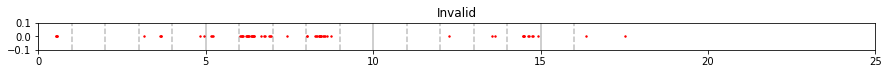

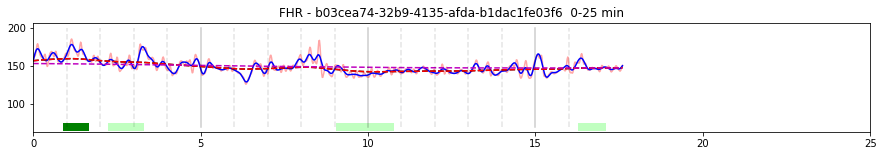

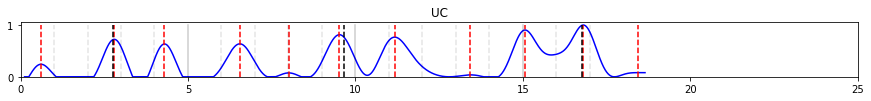

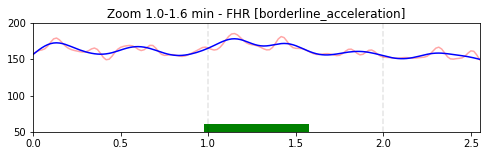

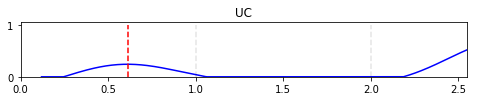

@ 1.15m : borderline_acceleration
                    25.9 bpm   dur:  33s (0.6min)   mag: 185.6 bpm   valid: 100%
                    tOnset:   9s   tRelease:  24s   span:  1.00 -  1.55 min


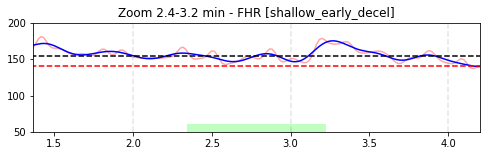

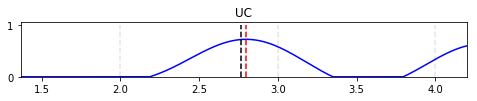

@ 2.77m : shallow_early_decel
                     4.5 bpm   dur:  50s (0.8min)   mag: 150.7 bpm   valid: 98%
                    tOnset:  24s   tRelease:  26s   span:  2.37 -  3.20 min
                    UC tAcme:  2.80m   lag:  -2s


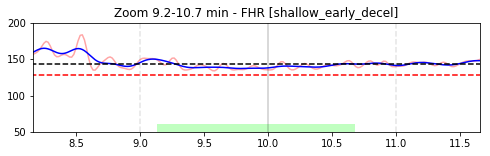

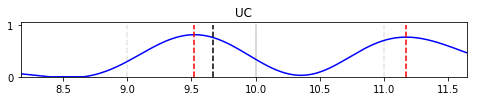

@ 9.67m : shallow_early_decel
                     5.9 bpm   dur:  89s (1.5min)   mag: 137.6 bpm   valid: 100%
                    tOnset:  30s   tRelease:  59s   span:  9.17 - 10.65 min
                    UC tAcme:  9.52m   lag:   9s


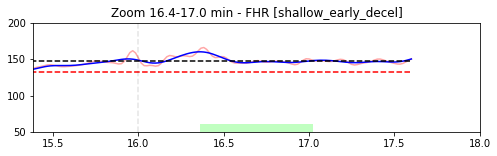

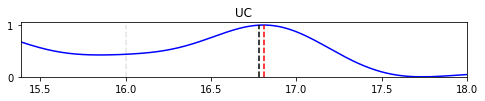

@16.78m : shallow_early_decel
                     2.0 bpm   dur:  37s (0.6min)   mag: 145.3 bpm   valid: 100%
                    tOnset:  24s   tRelease:  13s   span: 16.38 - 17.00 min
                    UC tAcme: 16.81m   lag:  -2s

----------


****************************************


Patient: 2
Patient:  August 6, 2018, Pt A -- 05de685b-e73e-4ada-9a49-b29aa81a4d37
Comment: Healthy, G2 P1.
Referred to QECH due to big fundus.
Used belt for doppler, had to secure at the back of woman because of fundus size.
Had no trouble finding fetal heart and remained audible throughout recording though was losing it during peak of contractions.
Mother was in upright sitting position.
Had to switch off and on tocopatch for it to ping successfully.
FHR- had interference at beginning which showed FH increased but counted manually and it was within normal range especially the first 9 mins.


The two recordings for 10 August were recorded for this pt by mistake.
G3 P2
1 previous scar scheduled for 

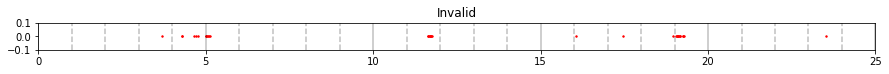

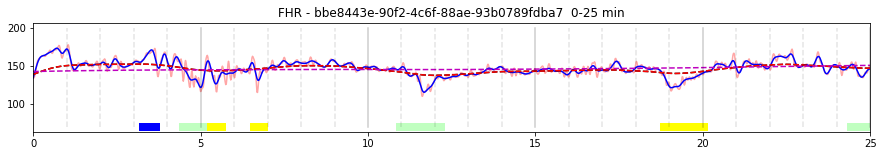

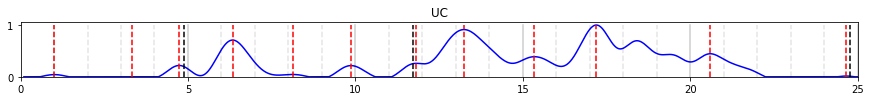

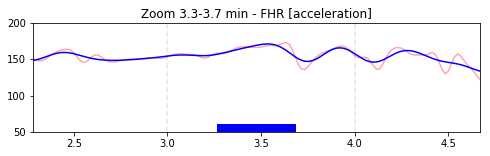

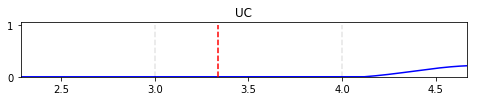

@ 3.60m : acceleration
                    18.2 bpm   dur:  23s (0.4min)   mag: 170.2 bpm   valid: 100%
                    tOnset:  19s   tRelease:   4s   span:  3.28 -  3.67 min


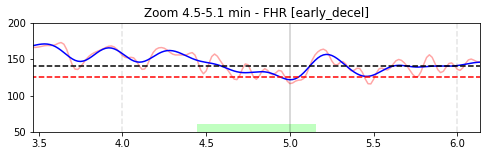

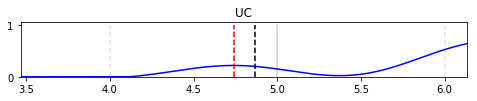

@ 4.87m : early_decel
                    13.8 bpm   dur:  40s (0.7min)   mag: 127.3 bpm   valid: 78%
                    tOnset:  24s   tRelease:  16s   span:  4.47 -  5.13 min
                    UC tAcme:  4.74m   lag:   8s


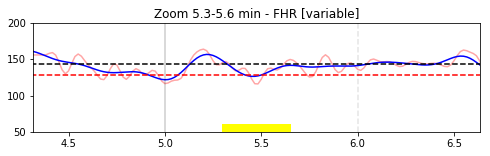

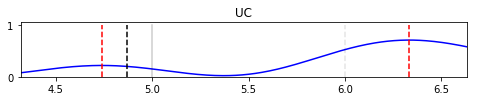

@ 5.45m : variable
                    27.7 bpm   dur:  19s (0.3min)   mag: 116.1 bpm   valid: 100%
                    tOnset:   8s   tRelease:  11s   span:  5.32 -  5.63 min


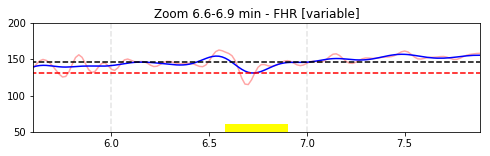

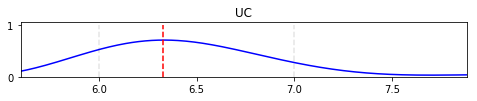

@ 6.73m : variable
                    31.0 bpm   dur:  17s (0.3min)   mag: 115.2 bpm   valid: 100%
                    tOnset:   8s   tRelease:   9s   span:  6.60 -  6.88 min


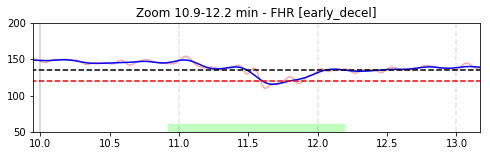

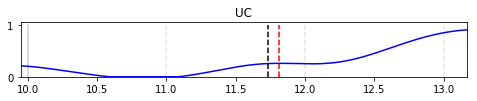

@11.73m : early_decel
                    17.0 bpm   dur:  73s (1.2min)   mag: 118.6 bpm   valid: 89%
                    tOnset:  47s   tRelease:  26s   span: 10.95 - 12.17 min
                    UC tAcme: 11.82m   lag:  -5s


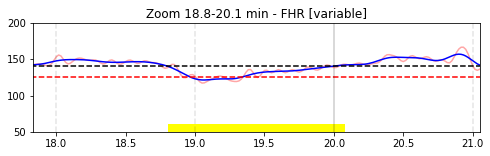

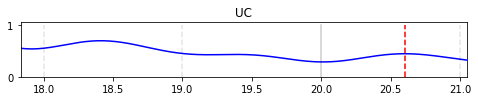

@19.07m : variable
                    23.2 bpm   dur:  73s (1.2min)   mag: 117.2 bpm   valid: 84%
                    tOnset:  14s   tRelease:  59s   span: 18.83 - 20.05 min


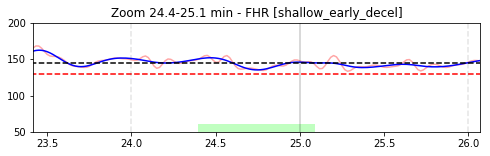

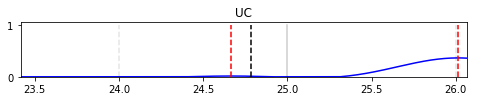

@24.78m : shallow_early_decel
                     5.4 bpm   dur:  39s (0.6min)   mag: 139.5 bpm   valid: 97%
                    tOnset:  22s   tRelease:  17s   span: 24.42 - 25.07 min
                    UC tAcme: 24.66m   lag:   7s

----------



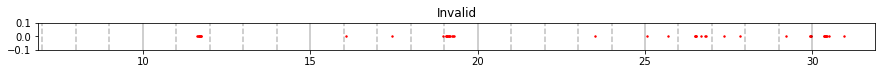

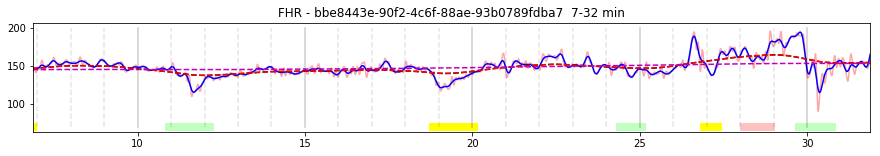

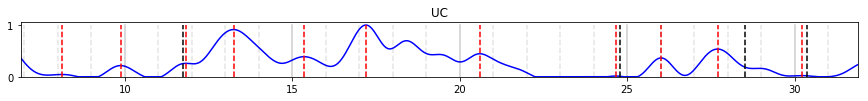

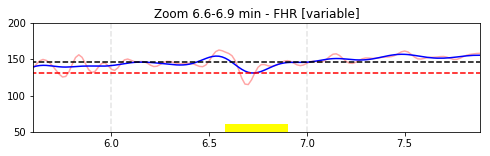

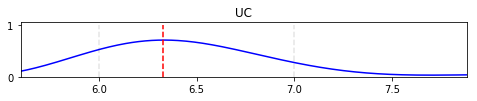

@ 6.73m : variable
                    31.0 bpm   dur:  17s (0.3min)   mag: 115.2 bpm   valid: 100%
                    tOnset:   8s   tRelease:   9s   span:  6.60 -  6.88 min


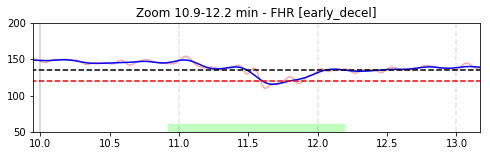

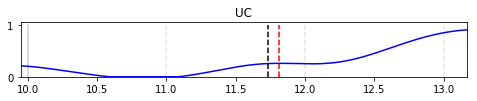

@11.73m : early_decel
                    17.0 bpm   dur:  73s (1.2min)   mag: 118.6 bpm   valid: 89%
                    tOnset:  47s   tRelease:  26s   span: 10.95 - 12.17 min
                    UC tAcme: 11.82m   lag:  -5s


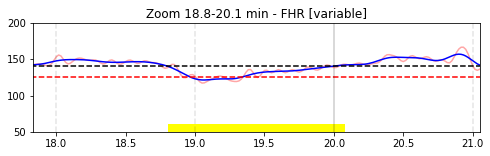

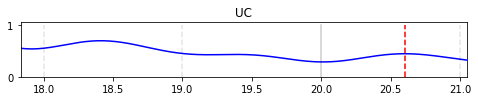

@19.07m : variable
                    23.2 bpm   dur:  73s (1.2min)   mag: 117.2 bpm   valid: 84%
                    tOnset:  14s   tRelease:  59s   span: 18.83 - 20.05 min


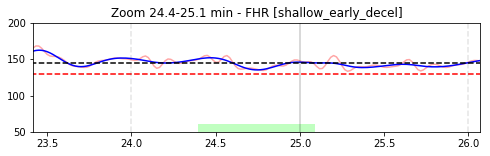

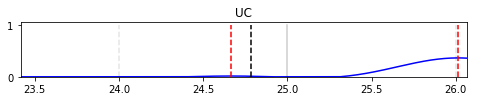

@24.78m : shallow_early_decel
                     5.4 bpm   dur:  39s (0.6min)   mag: 139.5 bpm   valid: 97%
                    tOnset:  22s   tRelease:  17s   span: 24.42 - 25.07 min
                    UC tAcme: 24.66m   lag:   7s


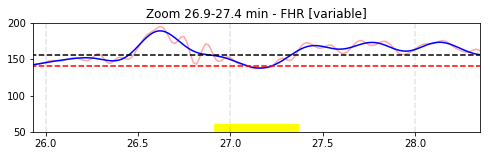

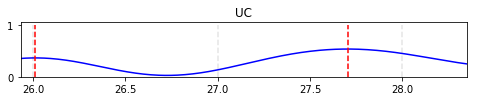

@27.17m : variable
                    20.0 bpm   dur:  25s (0.4min)   mag: 137.2 bpm   valid: 100%
                    tOnset:  14s   tRelease:  11s   span: 26.93 - 27.35 min


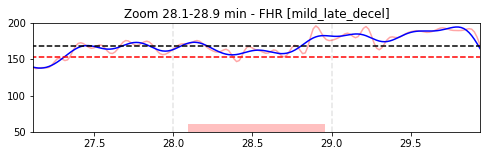

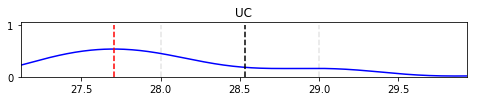

@28.53m : mild_late_decel
                    10.2 bpm   dur:  49s (0.8min)   mag: 157.6 bpm   valid: 100%
                    tOnset:  25s   tRelease:  24s   span: 28.12 - 28.93 min
                    UC tAcme: 27.70m   lag:  50s


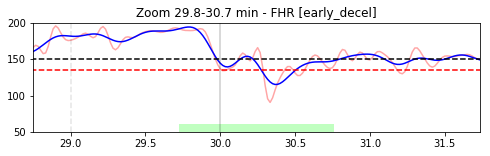

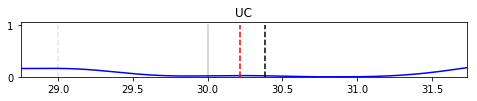

@30.38m : early_decel
                    22.2 bpm   dur:  59s (1.0min)   mag: 127.8 bpm   valid: 80%
                    tOnset:  38s   tRelease:  21s   span: 29.75 - 30.73 min
                    UC tAcme: 30.22m   lag:  10s

----------


****************************************



In [16]:
for fhr, mask, ts, allUC, sigUC, tsUC, name in getRecordingsLowCostCTG(subset_recordings, catalog, path):
        
    displayRecordingAll(fhr, mask, ts, allUC=allUC, filtUC=sigUC, tsUC=tsUC,
                        name=name, plotIncr = 20, showAltBaselines=True,
                        showFull=True, showIndividualDecels=True,
                        allExtractorParams=FEATURE_EXTRACT_PARAMS)